# plot column-min o2 saturation

In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import cmocean
import plot_tools

In [2]:
woapth = '/glade/p/ncgd0033/obs/woa2013v2/1x1d'

woa_info = {
    'O2': {'varname': 'o_an', 'file' : os.path.join(woapth,'woa13_all_o00_01.nc')},   
    'O2sat': {'varname': 'O_an', 'file': os.path.join(woapth,'woa13_all_O00_01.nc')},
    'AOU': {'varname': 'A_an', 'file' : os.path.join(woapth,'woa13_all_A00_01.nc')},    
    'T' : {'varname': 't_an', 'file': os.path.join(woapth,'woa13_decav_t01_01v2.nc')},
    'S' : {'varname': 's_an', 'file': os.path.join(woapth,'woa13_decav_s01_01v2.nc')}}

woa = {}
for v,info in woa_info.items():   
    varname = info['varname']
    file_in = info['file']
    woai = xr.open_dataset(file_in,decode_times=False)
    woai = woai.drop([k for k in woai if k not in [varname,'lat','lon','depth']])
    woai = woai.rename({varname:v})
    if woa:
        woa = xr.merge((woa,woai))
    else:
        woa = woai
         
ni = len(woa.lon)
nj = len(woa.lat)

mlperl_2_mmolm3 = 1.e6 / 1.e3 / 22.3916
for v in ['O2','AOU']:
    woa[v] = woa[v] * mlperl_2_mmolm3
    woa[v].attrs['units'] = 'mmol m$^{-3}$'
woa

<xarray.Dataset>
Dimensions:  (depth: 102, lat: 180, lon: 360, time: 1)
Coordinates:
  * depth    (depth) float64 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Dimensions without coordinates: time
Data variables:
    O2sat    (time, depth, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    AOU      (time, depth, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    S        (time, depth, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    O2       (time, depth, lat, lon) float64 nan nan nan nan nan nan nan nan ...
    T        (time, depth, lat, lon) float64 nan nan nan nan nan nan nan nan ...

## compute min O2

In [3]:
woa_min = woa.min(dim='depth').isel(time=0)
print woa_min   

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
Data variables:
    O2sat    (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    AOU      (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    S        (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    O2       (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    T        (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


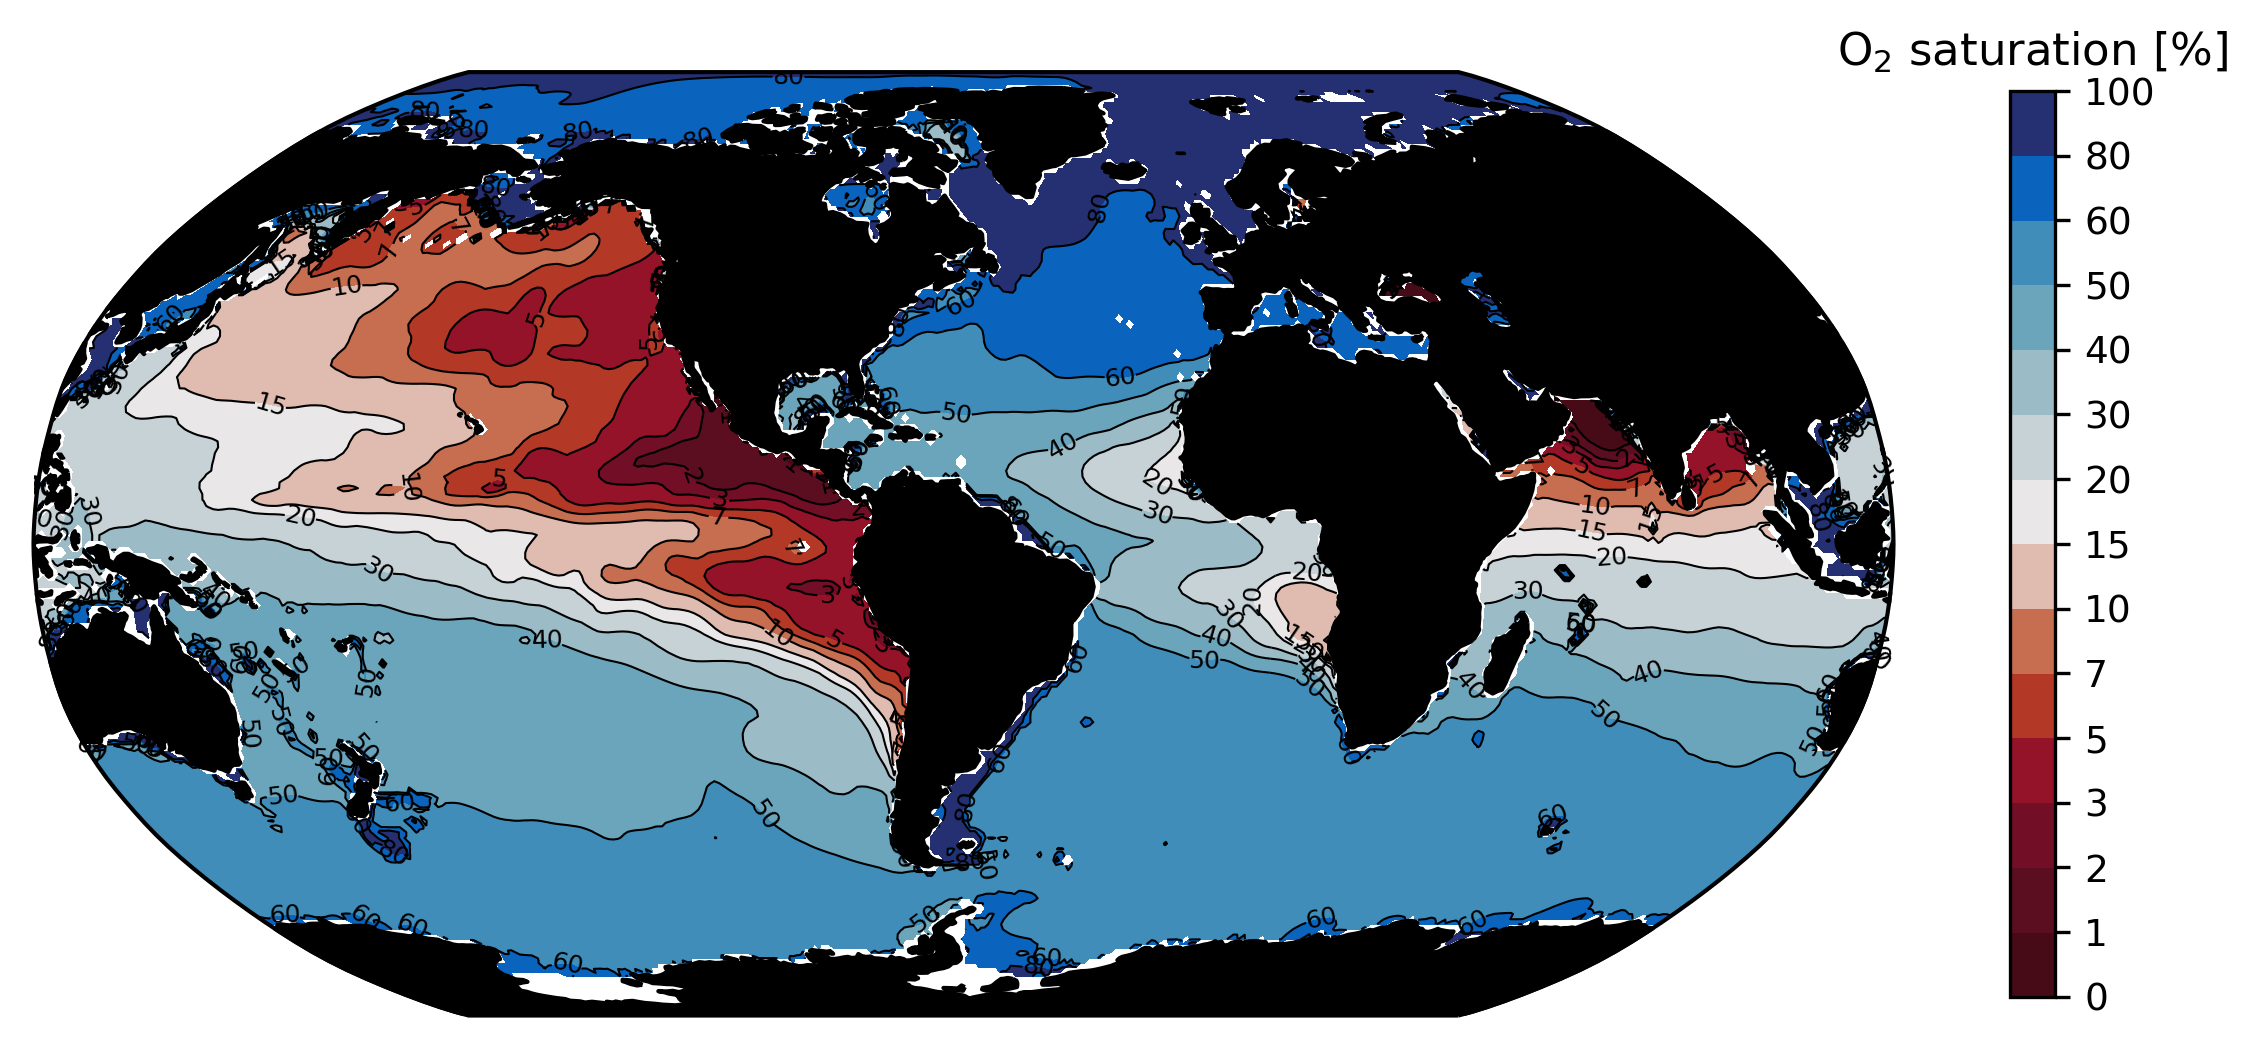

In [4]:
plot_name = os.path.join(diro['fig'],'woa-column-min-o2-sat.pdf')

units = 'O$_2$ saturation [%]'
levels = [0.,1.,2.,3.,5.,7.,10.,15.,20.,30.,40.,50.,60.,80.,100.]

z = woa_min.O2sat.values
lat = woa_min.lat.values
lon = woa_min.lon.values

lon = np.where(lon<0.,lon+360.,lon)
I = np.argsort(lon)
lon = lon[I]
z = z[:,I]
z,lon = add_cyclic_point(z,coord=lon)

fig=plt.figure(figsize=(10, 8),dpi=300)
gs = gridspec.GridSpec(1,1)

norm = plot_tools.MidPointNorm(midpoint=15)
contour_specs = {'levels':levels,'cmap':cmocean.cm.balance_r,'norm':norm}
obj = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                            contour_specs,
                                            units = units,
                                            fig=fig,
                                            gridspec=gs,
                                            row=0,col=0)
plt.savefig(plot_name,bbox_inches='tight')
